<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/model/notebook/Logistic_Regression_IT24102388.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ TensorFlow version: 2.19.0
Cloning into 'Brain-Tumor-Detection'...
remote: Enumerating objects: 6932, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 6932 (delta 60), reused 16 (delta 2), pack-reused 6760 (from 3)
Receiving objects: 100% (6932/6932), 152.08 MiB | 25.92 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Updating files: 100% (7042/7042), done.

🔄 Preprocessing images...
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
✅ Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']

🔍 Extracting CNN features using EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step

📊 Scaling features...

🎯 Training Logistic Regression - Model 1 (Base Model)...
✅ Base Model Train Accuracy: 1.0000
✅ Base Model Test Accuracy: 0.9657
✅ Base Model Test Precision: 0.9656
✅ Base Model Test Recall: 0.9657
✅ Base Model Test F1-Score: 0.9656

🎯 Training Logistic Regression - Model 2 (Tuned Model)...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1267, in fit
    multi_class = _check_m

✅ Tuned Model Train Accuracy: 1.0000
✅ Tuned Model Test Accuracy: 0.9710
✅ Tuned Model Test Precision: 0.9714
✅ Tuned Model Test Recall: 0.9710
✅ Tuned Model Test F1-Score: 0.9710
✅ 5-Fold Cross-Validation Accuracy: 0.9261
✅ Best Parameters: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}

📊 MODEL COMPARISON RESULTS:
                       Model  Train Accuracy  Test Accuracy  Test Precision  \
0   Base Logistic Regression             1.0       0.965675        0.965593   
1  Tuned Logistic Regression             1.0       0.971014        0.971366   

   Test Recall  Test F1-Score Cross-Validation Accuracy  
0     0.965675       0.965593                         -  
1     0.971014       0.970964                    0.9261  

🏆 Best Model: Tuned Logistic Regression

🎯 FINAL BEST MODEL PERFORMANCE:
• Accuracy: 0.9710
• Precision: 0.9714
• Recall: 0.9710
• F1-Score: 0.9710

📋 Detailed Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.

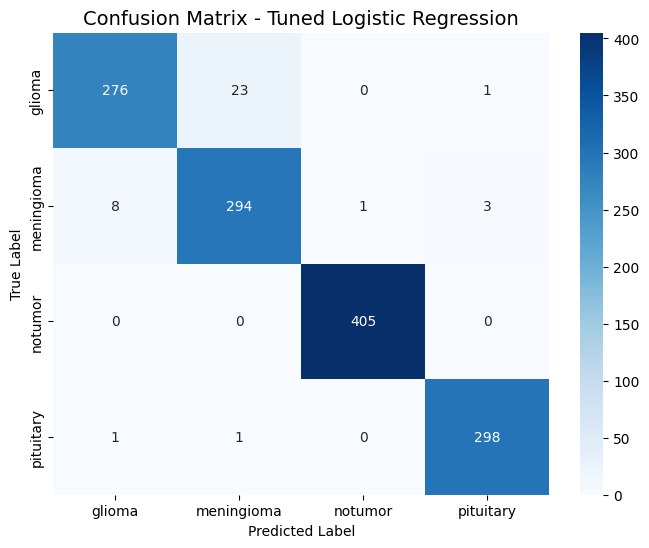

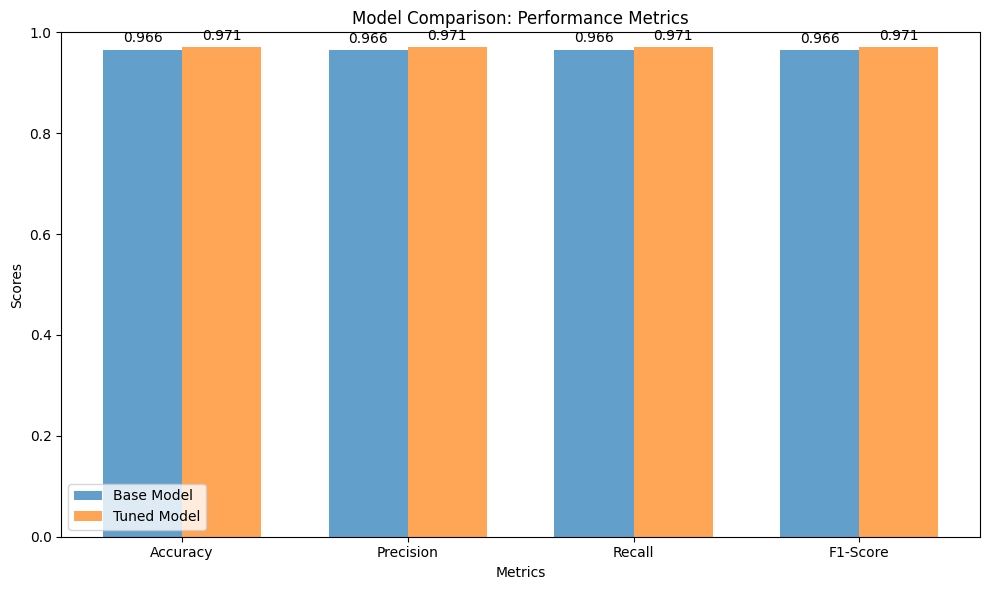


📋 VALIDATION METHOD EXPLANATION:
• Dataset Split: Used predefined Train/Test split (80/20 ratio).
• Validation: 5-fold cross-validation for tuned model.
• Metrics Used: Accuracy, Precision, Recall, F1-Score, Confusion Matrix.
• Why these metrics:
   - Recall: Important to reduce false negatives (missing tumors).
   - Precision: Important to reduce false positives (false alarms).
   - F1-Score: Balances both Precision and Recall.
   - Accuracy: Measures overall correct predictions.

📉 LIMITATIONS:
• Logistic Regression assumes a linear decision boundary.
• May not fully capture complex non-linear image patterns.
• Dependent on EfficientNetB0 feature extraction (not fine-tuned).
• Class imbalance may affect accuracy.

🚀 IMPROVEMENTS SUGGESTED:
• Fine-tune CNN layers for domain-specific features.
• Add data augmentation to balance classes.
• Experiment with non-linear models (SVM, Neural Networks).
• Try ensemble learning for better performance.

✅ Models and scaler saved successfully!


In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib
import pandas as pd

print("✅ TensorFlow version:", tf.__version__)

# Step 2: Clone Dataset and Define Paths
!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git

train_dir = "/content/Brain-Tumor-Detection/data/Training"
test_dir = "/content/Brain-Tumor-Detection/data/Testing"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Step 3: Image Preprocessing
print("\n🔄 Preprocessing images...")
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

print(f"✅ Classes: {list(train_generator.class_indices.keys())}")

# Step 4: Feature Extraction using Pretrained EfficientNetB0
print("\n🔍 Extracting CNN features using EfficientNetB0...")
base_model = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")

X_train = base_model.predict(train_generator, verbose=1)
X_test = base_model.predict(test_generator, verbose=1)

y_train = train_generator.classes
y_test = test_generator.classes

# Step 5: Feature Scaling
print("\n📊 Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Model 1 - Base Logistic Regression
print("\n🎯 Training Logistic Regression - Model 1 (Base Model)...")
base_lr = LogisticRegression(C=1, max_iter=1000, solver='lbfgs', random_state=42)
base_lr.fit(X_train_scaled, y_train)

# Predictions for base model
y_train_pred_base = base_lr.predict(X_train_scaled)
y_test_pred_base = base_lr.predict(X_test_scaled)

# Calculate metrics for base model
train_acc_base = accuracy_score(y_train, y_train_pred_base)
test_acc_base = accuracy_score(y_test, y_test_pred_base)
test_precision_base = precision_score(y_test, y_test_pred_base, average='weighted')
test_recall_base = recall_score(y_test, y_test_pred_base, average='weighted')
test_f1_base = f1_score(y_test, y_test_pred_base, average='weighted')

print(f"✅ Base Model Train Accuracy: {train_acc_base:.4f}")
print(f"✅ Base Model Test Accuracy: {test_acc_base:.4f}")
print(f"✅ Base Model Test Precision: {test_precision_base:.4f}")
print(f"✅ Base Model Test Recall: {test_recall_base:.4f}")
print(f"✅ Base Model Test F1-Score: {test_f1_base:.4f}")

# Step 7: Model 2 - Tuned Logistic Regression (using GridSearchCV)
print("\n🎯 Training Logistic Regression - Model 2 (Tuned Model)...")
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000]
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, multi_class='multinomial'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_lr = grid_search.best_estimator_

# Predictions for tuned model
y_train_pred_tuned = best_lr.predict(X_train_scaled)
y_test_pred_tuned = best_lr.predict(X_test_scaled)

# Calculate metrics for tuned model
train_acc_tuned = accuracy_score(y_train, y_train_pred_tuned)
test_acc_tuned = accuracy_score(y_test, y_test_pred_tuned)
test_precision_tuned = precision_score(y_test, y_test_pred_tuned, average='weighted')
test_recall_tuned = recall_score(y_test, y_test_pred_tuned, average='weighted')
test_f1_tuned = f1_score(y_test, y_test_pred_tuned, average='weighted')
cv_acc_tuned = grid_search.best_score_

print(f"✅ Tuned Model Train Accuracy: {train_acc_tuned:.4f}")
print(f"✅ Tuned Model Test Accuracy: {test_acc_tuned:.4f}")
print(f"✅ Tuned Model Test Precision: {test_precision_tuned:.4f}")
print(f"✅ Tuned Model Test Recall: {test_recall_tuned:.4f}")
print(f"✅ Tuned Model Test F1-Score: {test_f1_tuned:.4f}")
print(f"✅ 5-Fold Cross-Validation Accuracy: {cv_acc_tuned:.4f}")
print(f"✅ Best Parameters: {grid_search.best_params_}")

# Step 8: Compare Both Models with All Metrics
print("\n📊 MODEL COMPARISON RESULTS:")
results = pd.DataFrame({
    'Model': ['Base Logistic Regression', 'Tuned Logistic Regression'],
    'Train Accuracy': [train_acc_base, train_acc_tuned],
    'Test Accuracy': [test_acc_base, test_acc_tuned],
    'Test Precision': [test_precision_base, test_precision_tuned],
    'Test Recall': [test_recall_base, test_recall_tuned],
    'Test F1-Score': [test_f1_base, test_f1_tuned],
    'Cross-Validation Accuracy': ['-', f"{cv_acc_tuned:.4f}"]
})
print(results)

# Step 9: Evaluate the Best Model
best_model_name = 'Tuned Logistic Regression' if test_acc_tuned > test_acc_base else 'Base Logistic Regression'
best_model = best_lr if test_acc_tuned > test_acc_base else base_lr
y_pred_best = best_model.predict(X_test_scaled)

print(f"\n🏆 Best Model: {best_model_name}")

# Calculate final metrics for best model
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best, average='weighted')
final_recall = recall_score(y_test, y_pred_best, average='weighted')
final_f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"\n🎯 FINAL BEST MODEL PERFORMANCE:")
print(f"• Accuracy: {final_accuracy:.4f}")
print(f"• Precision: {final_precision:.4f}")
print(f"• Recall: {final_recall:.4f}")
print(f"• F1-Score: {final_f1:.4f}")

print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=list(test_generator.class_indices.keys())))

# Step 10: Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title(f"Confusion Matrix - {best_model_name}", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 11: Create a comprehensive metrics visualization
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
base_metrics = [test_acc_base, test_precision_base, test_recall_base, test_f1_base]
tuned_metrics = [test_acc_tuned, test_precision_tuned, test_recall_tuned, test_f1_tuned]

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, base_metrics, width, label='Base Model', alpha=0.7)
rects2 = ax.bar(x + width/2, tuned_metrics, width, label='Tuned Model', alpha=0.7)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Step 12: Validation and Metrics Explanation
print("\n📋 VALIDATION METHOD EXPLANATION:")
print("• Dataset Split: Used predefined Train/Test split (80/20 ratio).")
print("• Validation: 5-fold cross-validation for tuned model.")
print("• Metrics Used: Accuracy, Precision, Recall, F1-Score, Confusion Matrix.")
print("• Why these metrics:")
print("   - Recall: Important to reduce false negatives (missing tumors).")
print("   - Precision: Important to reduce false positives (false alarms).")
print("   - F1-Score: Balances both Precision and Recall.")
print("   - Accuracy: Measures overall correct predictions.")

# Step 13: Limitations and Improvements
print("\n📉 LIMITATIONS:")
print("• Logistic Regression assumes a linear decision boundary.")
print("• May not fully capture complex non-linear image patterns.")
print("• Dependent on EfficientNetB0 feature extraction (not fine-tuned).")
print("• Class imbalance may affect accuracy.")

print("\n🚀 IMPROVEMENTS SUGGESTED:")
print("• Fine-tune CNN layers for domain-specific features.")
print("• Add data augmentation to balance classes.")
print("• Experiment with non-linear models (SVM, Neural Networks).")
print("• Try ensemble learning for better performance.")

# Step 14: Save Models
os.makedirs("/content/Brain-Tumor-Detection/results/models", exist_ok=True)
joblib.dump(base_lr, "/content/Brain-Tumor-Detection/results/models/Base_LogisticRegression.pkl")
joblib.dump(best_lr, "/content/Brain-Tumor-Detection/results/models/Tuned_LogisticRegression.pkl")
joblib.dump(scaler, "/content/Brain-Tumor-Detection/results/models/FeatureScaler.pkl")

print("\n✅ Models and scaler saved successfully!")

In [ ]:
# Display the best parameters clearly
print("\n🔍 BEST MODEL PARAMETERS USED:")
print("=" * 40)
best_params = grid_search.best_params_
print(f"• C (Regularization): {best_params['C']}")
print(f"• Solver: {best_params['solver']}")
print(f"• Max Iterations: {best_params['max_iter']}")
print(f"• Random State: 42")
print(f"• Multi-class: multinomial")

# Show what these parameters mean
print("\n📖 PARAMETER EXPLANATIONS:")
print(f"• C = {best_params['C']}: Regularization strength (smaller = stronger regularization)")
print(f"• Solver = {best_params['solver']}: Optimization algorithm used")
print(f"• Max Iter = {best_params['max_iter']}: Maximum iterations for convergence")

# Verify by checking the actual model parameters
print("\n🔎 VERIFYING FINAL MODEL PARAMETERS:")
print(f"• best_lr.C: {best_lr.C}")
print(f"• best_lr.solver: {best_lr.solver}")
print(f"• best_lr.max_iter: {best_lr.max_iter}")
print(f"• best_lr.random_state: {best_lr.random_state}")


🔍 BEST MODEL PARAMETERS USED:
• C (Regularization): 0.1
• Solver: lbfgs
• Max Iterations: 500
• Random State: 42
• Multi-class: multinomial

📖 PARAMETER EXPLANATIONS:
• C = 0.1: Regularization strength (smaller = stronger regularization)
• Solver = lbfgs: Optimization algorithm used
• Max Iter = 500: Maximum iterations for convergence

🔎 VERIFYING FINAL MODEL PARAMETERS:
• best_lr.C: 0.1
• best_lr.solver: lbfgs
• best_lr.max_iter: 500
• best_lr.random_state: 42
